##**Importing Libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import layers, models
import tensorflow as tf

###**Load Data**

In [2]:
df = pd.read_csv('/content/Car Price - Car Price.csv')

In [4]:
df.shape

(4340, 9)

###**Remove Duplicates**

In [5]:
df.duplicated().sum()

763

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df = df.drop(columns=['Model'])

##**Handling Categorical Features**

In [8]:
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [9]:
categorical_cols = ['Brand', 'Fuel', 'Seller_Type', 'Transmission', 'Owner']

In [10]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

##**Scaling**

In [11]:
scaler = StandardScaler()
X[['Year', 'KM_Driven']] = scaler.fit_transform(X[['Year', 'KM_Driven']])

###**Train Test Split**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Artificial Neural Network model building**

In [13]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###**Model Compile**

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

###**Model Fit**

In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 454523289600.0000 - val_loss: 519506526208.0000
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 457176776704.0000 - val_loss: 515578200064.0000
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 482687483904.0000 - val_loss: 493830012928.0000
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 410137198592.0000 - val_loss: 436198309888.0000
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 339410878464.0000 - val_loss: 365603586048.0000
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 276468105216.0000 - val_loss: 340176371712.0000
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 221841195008.0000 - val_loss: 337273782272.0000
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250091880448.0000 - val_loss: 335297609728.0000
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227683876864.0000 - val_loss: 333330186240.0000
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

<Axes: >

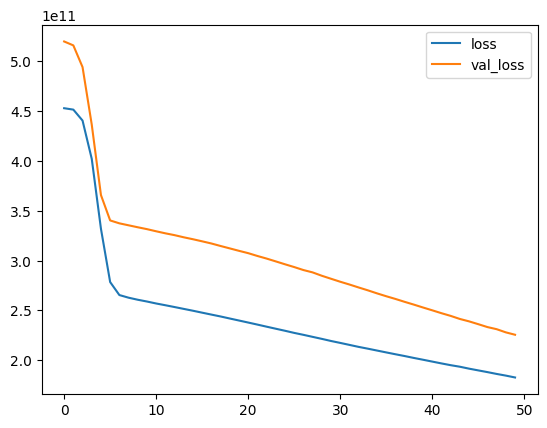

In [19]:
pd.DataFrame(history.history).plot()

###**Model Evalution**

In [16]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 285587177472.0000
Test Loss: 252980445184.0


###**Predictions**

In [17]:
predictions = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [18]:
print(predictions[:5])

[[750736.75]
 [527101.9 ]
 [523392.06]
 [958314.06]
 [ 57267.92]]


###**Model Dump**

In [20]:
import joblib

In [29]:
tf.keras.models.save_model(model, 'car_price_model.h5')

In [21]:
joblib.dump(model, 'car_price_model.joblib')

['car_price_model.joblib']

In [22]:
joblib.dump(label_encoders, 'label_encoders.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']